<img src="https://5938490.fs1.hubspotusercontent-na1.net/hubfs/5938490/essential-guide-to-ad-fraud-detection-featured-image-2.png" alt="Image Description" width="700" height="300">


###

## 1. Data Loading, Libraries, and Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
df.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [5]:
df.tail(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df.duplicated().sum()

1081

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [13]:
df["Amount"].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
df["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

## **highly imbalanced** 

this case is a highly imbalanced classification problem (fraud vs. non-fraud) with a 1:1000 imbalance ratio. 

In [15]:
df["Time"].describe()

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

## **"Time" feature**

The "Time" feature represents the seconds elapsed since the first recorded transaction in the dataset. Analyzing it can help detect fraud patterns by identifying peak fraud hours, unusual time gaps, or rapid successive transactions.

In [16]:
num_fraud = df["Class"].sum() 
num_non_fraud = (df["Class"] == 0).sum()


## 2. EDA

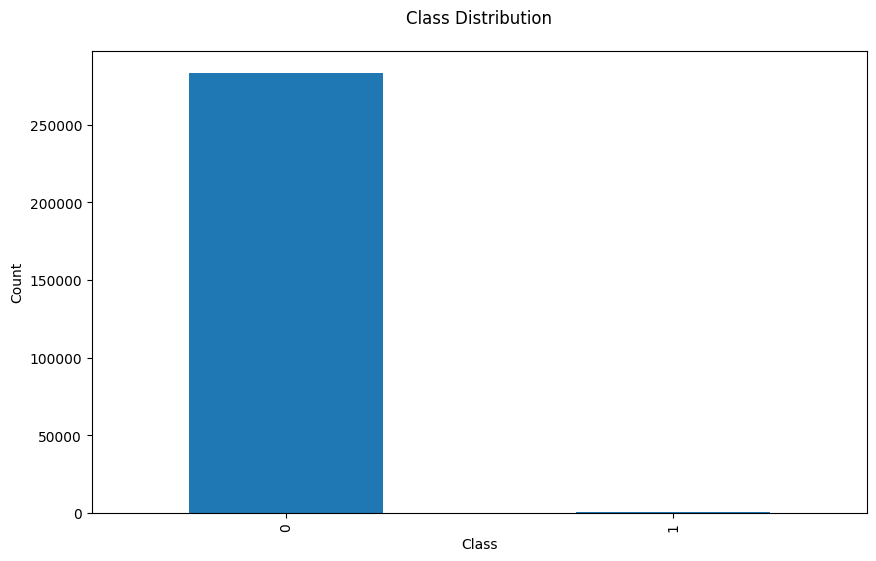

In [17]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution',pad = 20)
plt.ylabel('Count')
plt.show()

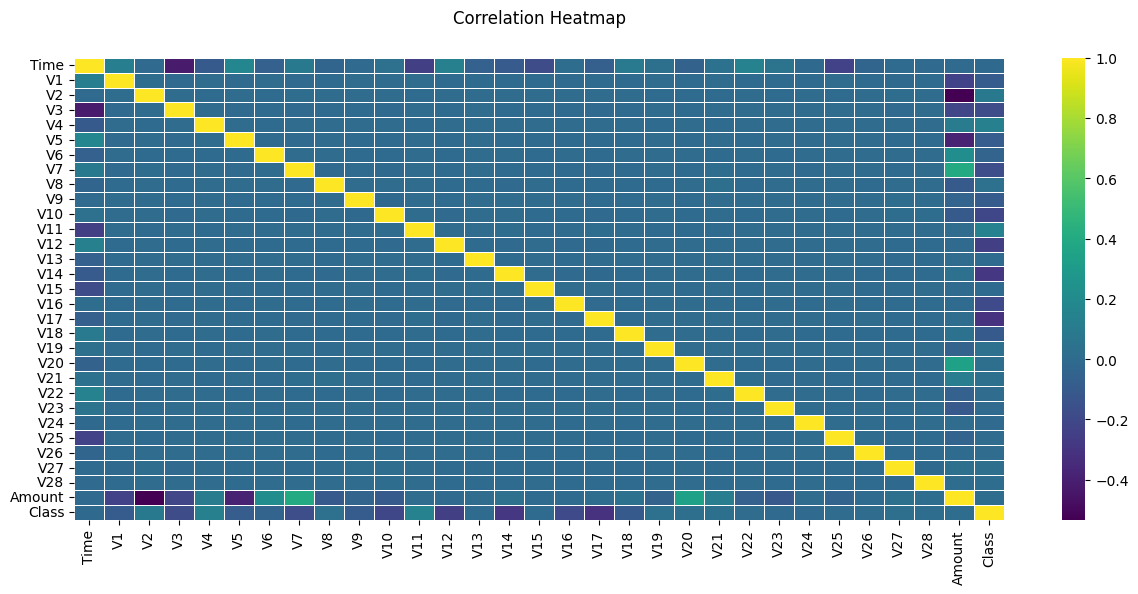

In [18]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap="viridis", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap", pad=25)
plt.show()


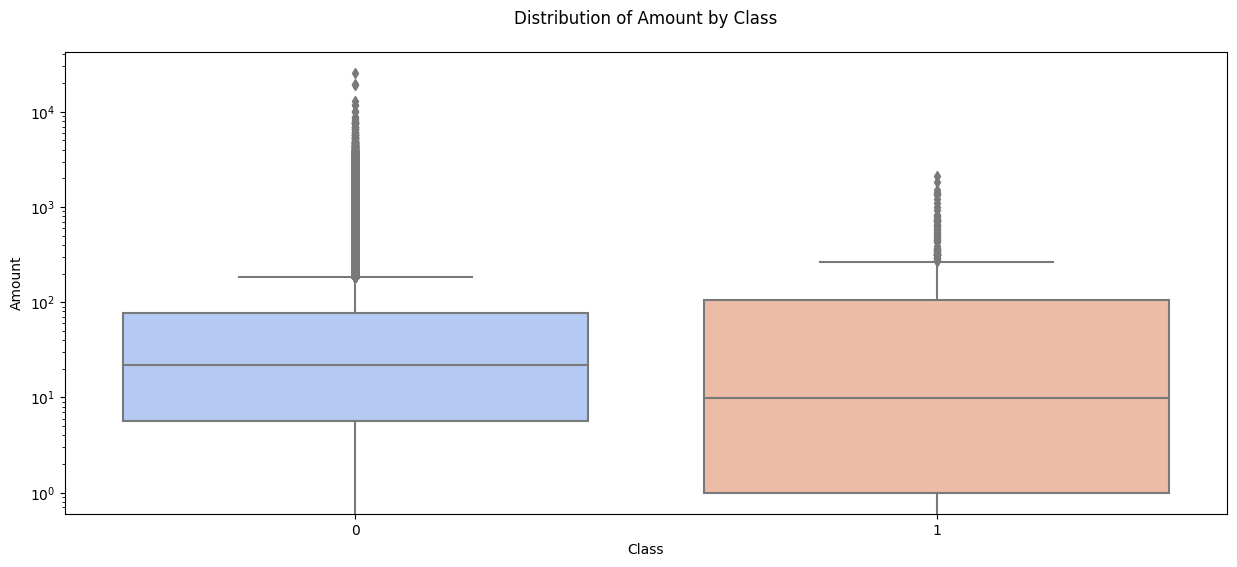

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df["Class"], y=df["Amount"], palette="coolwarm")
plt.yscale("log") 
plt.title("Distribution of Amount by Class", pad=20)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


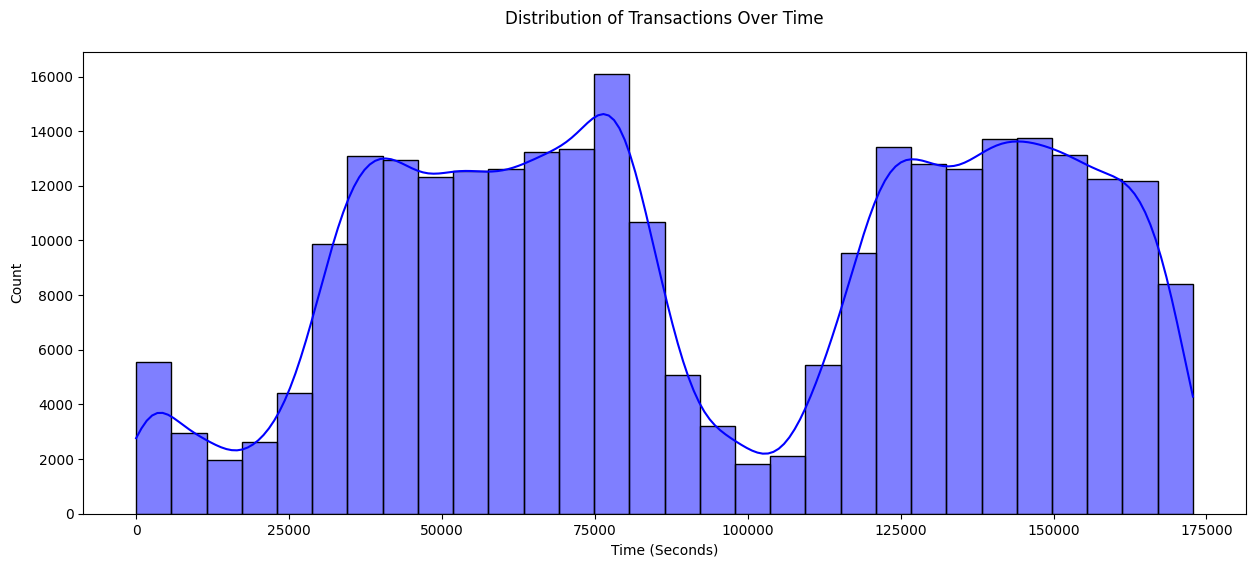

In [20]:
plt.figure(figsize=(15,6))
sns.histplot(df["Time"], bins=30, kde=True, color="blue")
plt.xlabel("Time (Seconds)")
plt.ylabel("Count")
plt.title("Distribution of Transactions Over Time", pad=20)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


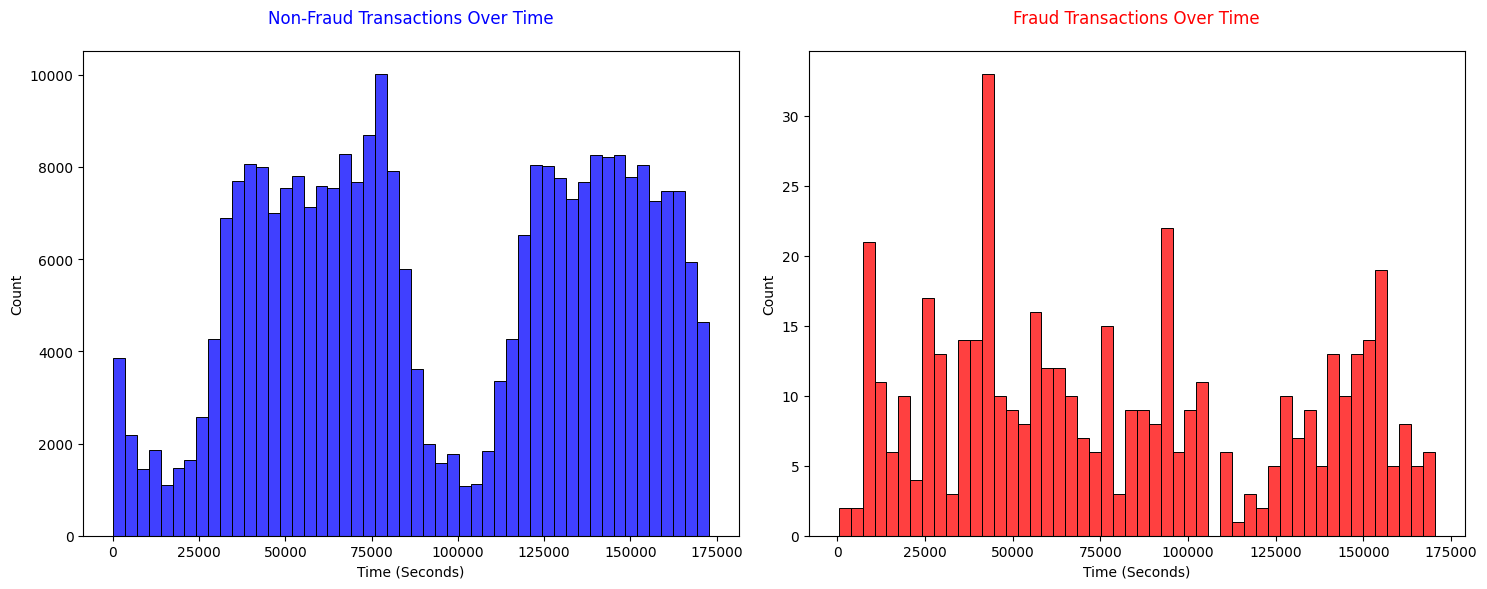

In [21]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(df[df["Class"] == 0]["Time"], bins=50, color="blue")
plt.xlabel("Time (Seconds)")
plt.ylabel("Count")
plt.title("Non-Fraud Transactions Over Time", pad=20, color="blue")

plt.subplot(1,2,2)
sns.histplot(df[df["Class"] == 1]["Time"], bins=50, color="red")
plt.xlabel("Time (Seconds)")
plt.ylabel("Count")
plt.title("Fraud Transactions Over Time", pad=20, color="red")

plt.tight_layout()
plt.show()


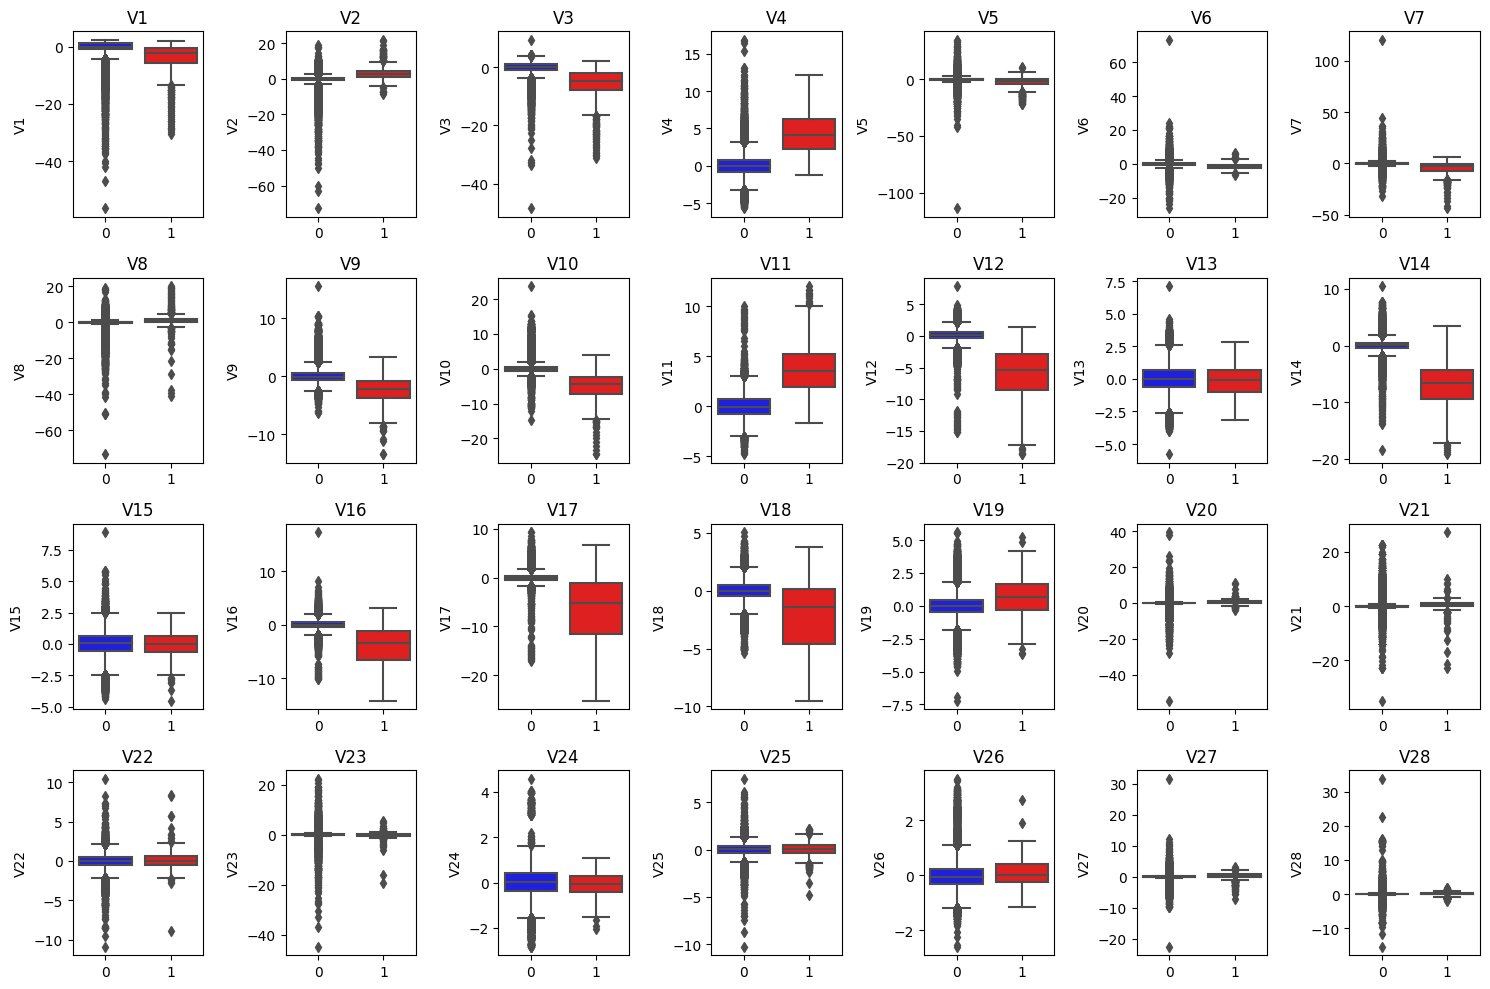

In [22]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.iloc[:,1:29].columns, 1):
    plt.subplot(4,7,i)
    sns.boxplot(x=df["Class"], y=df[col], palette={0: "blue", 1: "red"})
    plt.xlabel("")
    plt.title(col)

plt.tight_layout()
plt.show()


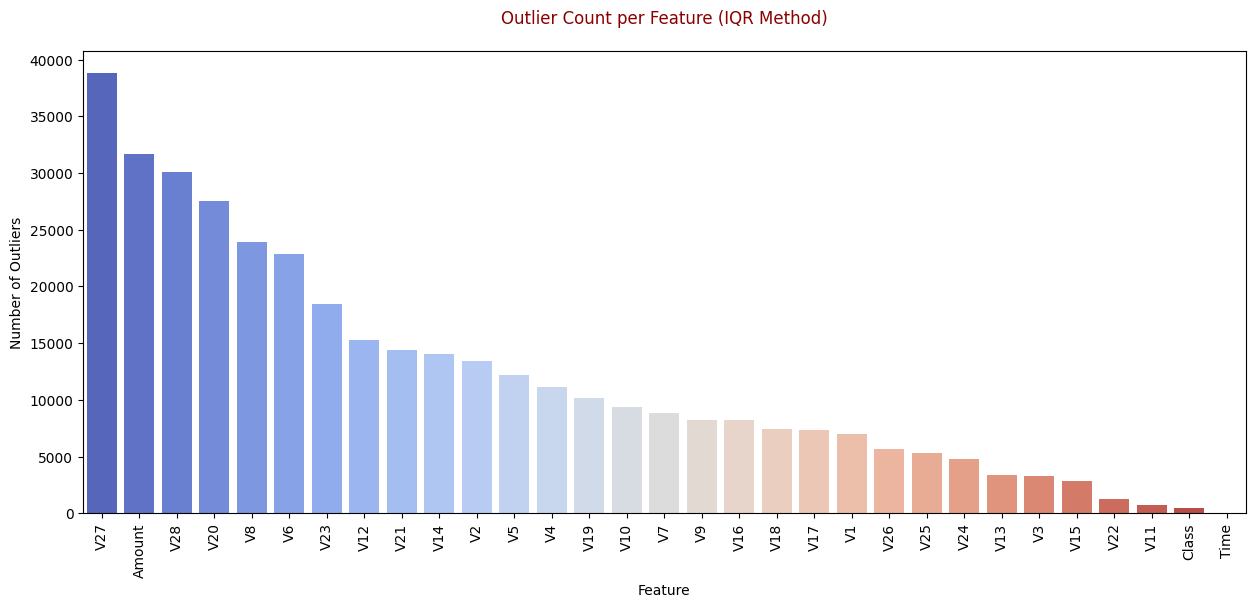

In [23]:
outlier_counts = {}

for feature in df.columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    
    outlier_counts[feature] = outliers.sum()

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df.sort_values(by="Outlier Count", ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=outlier_df.index, y=outlier_df["Outlier Count"], palette="coolwarm")
plt.xticks(rotation=90) 
plt.xlabel("Feature")
plt.ylabel("Number of Outliers")
plt.title("Outlier Count per Feature (IQR Method)", color="darkred", pad = 20)
plt.show()


## **Outlier Detection Using the IQR Method**

The interquartile range (IQR) method is used to identify outliers for each feature in the dataset. For each feature, the first quartile (Q1) and third quartile (Q3) are calculated, and the IQR is determined as **IQR = Q3 - Q1**. Outliers are defined as values falling below **Q1 - 1.5 × IQR** or above **Q3 + 1.5 × IQR**. The number of outliers per feature is counted and visualized using a bar chart, highlighting features with the most extreme values. This helps in understanding the distribution and anomaly patterns in the dataset.


## **Imbalanced Data in This Dataset**  
The dataset is highly imbalanced, with **only 294 fraud cases** (Class 1) compared to **284,807 non-fraud cases** (Class 0). This imbalance can lead to biased models that favor the majority class, reducing the ability to detect fraud. To address this, techniques like **SMOTE (Synthetic Minority Over-sampling Technique)**, **undersampling**, and **class-weight adjustments** can be applied. Additionally, using evaluation metrics like **Precision-Recall AUC**, **F1-score**, and **ROC-AUC** is crucial to assess model performance effectively instead of relying solely on accuracy.  



## **Understanding Features V1–V28**  
Features **V1 to V28** are anonymized numerical values obtained through **Principal Component Analysis (PCA)** to protect sensitive information. Since they are transformed, their direct interpretation is difficult, but patterns in their distributions can still indicate fraud tendencies. Some features, like **V10, V12, V14, and V16**, show significant differences between fraud and non-fraud transactions, making them key fraud indicators. Others, such as **V21, V25, and V28**, have weaker separation and may be less informative.

Proper feature scaling, selection, and engineering can improve fraud detection performance.


## 3. Feature Engineering

## **preprocessing**

I scaled Time and Amount using RobustScaler, replaced them with the scaled versions, then shuffled the data. To balance classes, I applied RandomUnderSampler, reducing non-fraud cases to 500 while keeping all fraud cases. Finally, I reshuffled and checked the class distribution.

Additionally, I standardized features V1 to V28 using StandardScaler, ensuring they have zero mean and unit variance. This helps models like Logistic Regression, XGBoost, and Random Forest perform better by handling different feature scales efficiently.

In [24]:
rob = RobustScaler()

Amount_Scale = rob.fit_transform(df["Amount"].values.reshape(-1,1))
Time_Scale = rob.fit_transform(df["Time"].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


In [25]:
features = [f"V{i}" for i in range(1, 29)]

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,0.085688,...,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0
1,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,-0.153784,...,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,0
2,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,0.194242,...,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,0
3,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,-0.049713,...,-0.270428,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0
4,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,0.700958,...,0.530343,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,0


In [26]:
df.insert(28,'Amount_Scale',Amount_Scale)
df.insert(29,'Time_Scale',Time_Scale)

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount_Scale,Time_Scale,Class
0,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,0.085688,...,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,1.774718,-0.995290,0
1,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,-0.153784,...,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.268530,-0.995290,0
2,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,0.194242,...,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,4.959811,-0.995279,0
3,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,-0.049713,...,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,1.411487,-0.995279,0
4,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,0.700958,...,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,0.667362,-0.995267,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-6.102103,6.118855,-6.519873,-1.459282,-3.897079,-1.956335,-4.007632,6.196662,1.749010,4.048299,...,0.154412,1.626230,-0.841382,2.757072,0.518377,2.380049,2.509507,-0.295230,1.035258,0
284803,-0.379208,-0.030938,1.347812,-0.520175,0.629193,0.795504,0.018351,0.250814,0.535282,-0.905314,...,1.275826,0.019665,-1.678330,-1.163409,-0.820253,0.168567,-0.164849,0.038798,1.035270,0
284804,0.982354,-0.180433,-2.155033,-0.392355,1.908988,2.276699,-0.243249,0.601561,0.396215,-0.449033,...,0.798074,-0.060444,1.056626,0.510299,-0.181557,0.006802,-0.082640,0.638020,1.035282,0
284805,-0.126465,0.324660,0.464577,0.489870,-0.275808,0.469130,-0.560399,0.576734,0.359367,-0.369456,...,1.104223,-0.262138,0.203081,-1.091530,1.133734,0.270523,0.317004,-0.166875,1.035282,0


In [27]:
df = df.sample(frac=1, random_state=42)

X = df.drop(columns=["Class"])
y = df["Class"]

rus = RandomUnderSampler(sampling_strategy={0: 500, 1: df["Class"].sum()}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

new_df = pd.DataFrame(X_resampled, columns=X.columns)
new_df["Class"] = y_resampled
new_df = new_df.sample(frac=1, random_state=42)

new_df.head(7)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount_Scale,Time_Scale,Class
162325,1.001641,-0.173843,-1.209171,-0.168744,0.801316,0.909115,-0.190744,0.300829,0.575253,-0.038899,...,1.635316,0.017577,-1.550654,0.334305,-0.697353,0.107717,-0.233175,-0.292032,0.356333,0
42945,-7.025933,4.247600,-9.128258,6.150457,-8.299744,-2.191338,-11.889564,7.314144,-7.383999,-11.872100,...,0.686791,-0.816879,1.209145,0.538661,0.580617,-3.559000,-2.024811,-0.295369,-0.509847,1
229802,-0.468293,0.831542,0.397341,-0.321304,1.017403,-0.444882,1.421891,-0.178978,-1.196998,-0.509346,...,0.150248,-0.972231,-0.693909,2.284006,-1.163451,-0.370191,0.058109,-0.057016,0.721144,0
185548,-0.872825,0.767616,0.910581,-0.672038,-0.732329,0.283810,-0.584447,1.115997,0.222943,-0.815629,...,0.153887,-0.296064,1.229660,0.765513,0.137847,0.446896,0.139162,0.074120,0.493841,0
197601,-1.015917,0.845031,0.673473,0.209666,-1.942098,1.822746,-2.075975,-4.093486,0.664489,0.252258,...,-1.228031,1.372781,-0.147948,-2.214110,-1.140183,1.775849,0.714139,1.780003,0.557018,0
195191,0.038259,0.327982,-0.437876,-0.404843,0.462370,-0.350958,0.954453,-0.082460,0.371795,-1.459507,...,-0.657289,0.295391,0.536096,-0.370622,-0.374304,-0.025585,0.121901,1.190377,0.543468,0
119781,-1.474460,1.427755,-2.687728,2.818821,-2.516339,-0.960873,-3.646415,1.032617,-2.107031,-5.122667,...,0.656761,0.648198,0.465330,-0.972083,-0.771474,1.550232,2.446804,1.425810,-0.107077,1


In [28]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


Distribution of the Classes in the subsample dataset
Class
0    0.513875
1    0.486125
Name: count, dtype: float64


## 4. Train Models

In [29]:
X = new_df.drop(columns=["Class"])
y = new_df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **LogisticRegression**

In [30]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

y_pred_LR = LR_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_LR)
report = classification_report(y_test, y_pred_LR)

print(f"Accuracy: {accuracy:.4f}")
print(report)


Accuracy: 0.9487
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.95      0.93      0.94        88

    accuracy                           0.95       195
   macro avg       0.95      0.95      0.95       195
weighted avg       0.95      0.95      0.95       195



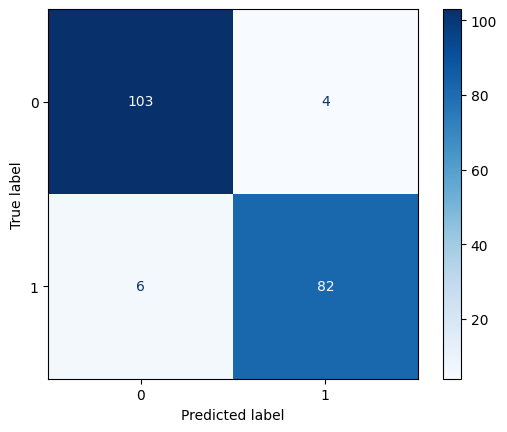

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred_LR)

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap="Blues", values_format='d')


## **RandomForestClassifier**

In [32]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(report_rf)


Random Forest Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       107
           1       0.97      0.88      0.92        88

    accuracy                           0.93       195
   macro avg       0.94      0.93      0.93       195
weighted avg       0.94      0.93      0.93       195



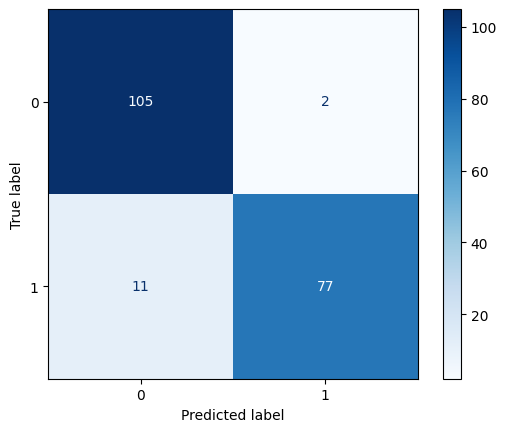

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap="Blues", values_format='d')


## **XGBoost**

In [34]:
xgb_model = XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(report_xgb)


XGBoost Accuracy: 0.9487
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       107
           1       0.94      0.94      0.94        88

    accuracy                           0.95       195
   macro avg       0.95      0.95      0.95       195
weighted avg       0.95      0.95      0.95       195



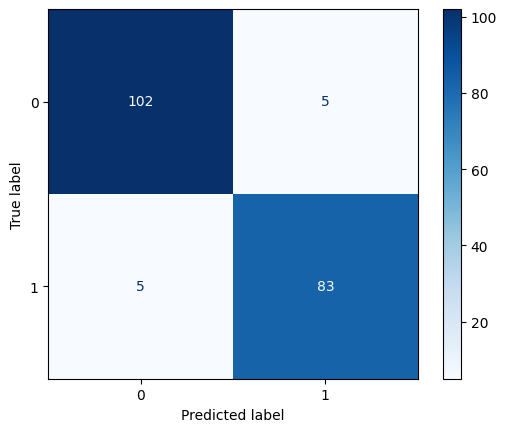

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap="Blues", values_format='d')


## **SVC**

In [36]:
svm_model = SVC(kernel='linear', C=0.1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(report_svm)

SVM Accuracy: 0.9538
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.96      0.93      0.95        88

    accuracy                           0.95       195
   macro avg       0.96      0.95      0.95       195
weighted avg       0.95      0.95      0.95       195



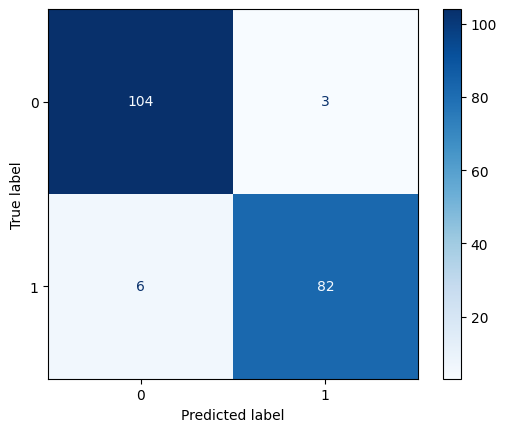

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap="Blues", values_format='d')
